# Introduction

This material assumes that you have programmed before. This first lecture provides a quick introduction to programming in Python for those who either haven't used Python before or need a quick refresher.

Let's start with a hypothetical problem we want to solve. We are interested in understanding the relationship between the weather and the number of mosquitos occuring in a particular year so that we can plan mosquito control measures accordingly. Since we want to apply these mosquito control measures at a number of different sites we need to understand both the relationship at a particular site and whether or not it is consistent across sites. The data we have to address this problem comes from the local government and are stored in tables in comma-separated values (CSV) files. Each file holds the data for a single location, each row holds the information for a single year at that location, and the columns hold the data on both mosquito numbers and the average temperature and rainfall from the beginning of mosquito breeding season. The first few rows of our first file look like:

~~~
year,temperature,rainfall,mosquitos
2001,87,222,198
2002,72,103,105
2003,77,176,166
~~~

## Objectives

* Conduct variable assignment, looping, and conditionals in Python
* Use an external Python library
* Read tabular data from a file
* Subset and perform analysis on data
* Display simple graphs

## Loading Data

In order to load the data, we need to import a library called Pandas that knows
how to operate on tables of data.

In [1]:
import pandas

We can now use Pandas to read our data file.

In [2]:
pandas.read_csv('A1_mosquito_data.csv')

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


The `read_csv()` function belongs to the `pandas` library. In order to run it we need to tell Python that it is part of `pandas` and we do this using the dot notation, which is used everywhere in Python to refer to parts of larger things.

When we are finished typing and press Shift+Enter, the notebook runs our command and shows us its output. In this case, the output is the data we just loaded.

Our call to `pandas.read_csv()` read data into memory, but didn't save it anywhere. To do that, we need to assign the array to a variable. In Python we use `=` to assign a new value to a variable like this:

In [3]:
data = pandas.read_csv('A1_mosquito_data.csv')

This statement doesn't produce any output because assignment doesn't display anything. If we want to check that our data has been loaded, we can print the variable's value:

In [4]:
print data

   year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243
5  2006           75       283        237
6  2007           80       214        190
7  2008           85       197        181
8  2009           74       231        200
9  2010           74       207        184

[10 rows x 4 columns]


`print data` tells Python to display the text. Alternatively we could just include `data` as the last value in a code cell:

In [5]:
data

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


This tells the IPython Notebook to display the `data` object, which is why we see a pretty formated table.

## Manipulating data

Once we have imported the data we can start doing things with it. First, let's ask what type of thing `data` refers to:

In [6]:
print type(data)

<class 'pandas.core.frame.DataFrame'>


The data is stored in a data structure called a DataFrame. There are other kinds of data structures that are also commonly used in scientific computing including Numpy arrays, and Numpy matrices, which can be used for doing linear algebra.

We can select an individual column of data using its name:

In [7]:
print data['year']

0    2001
1    2002
2    2003
3    2004
4    2005
5    2006
6    2007
7    2008
8    2009
9    2010
Name: year, dtype: int64


Or we can select several columns of data at once:

In [8]:
print data[['rainfall', 'temperature']]

   rainfall  temperature
0       157           80
1       252           85
2       154           86
3       159           87
4       292           74
5       283           75
6       214           80
7       197           85
8       231           74
9       207           74

[10 rows x 2 columns]


We can also select subsets of rows using slicing. Say we just want the first two rows of data:

In [9]:
print data[0:2]

   year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217

[2 rows x 4 columns]


There are a couple of important things to note here. First, Python indexing starts at zero. In contrast, programming languages like R and MATLAB start counting at 1, because that's what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because that's simpler for computers to do. This means that if we have 5 things in Python they are numbered 0, 1, 2, 3, 4, and the first row in a data frame is always row 0.

The other thing to note is that the subset of rows starts at the first value and goes up to, but does not include, the second value. Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

One thing that we can't do with this syntax is directly ask for the data from a single row:

In [10]:
data[1]

KeyError: u'no item named 1'

This is because there are several things that we could mean by `data[1]` so if we want a single row we can either take a slice that returns a single row:

In [11]:
print data[1:2]

   year  temperature  rainfall  mosquitos
1  2002           85       252        217

[1 rows x 4 columns]


or use the `.iloc` method, which stands for "integer location" since we are looking up the row based on its integer index.

In [12]:
print data.iloc[1]

year           2002
temperature      85
rainfall        252
mosquitos       217
Name: 1, dtype: int64


We can also use this same syntax for getting larger subsets of rows:

In [13]:
print data.iloc[1:3]

   year  temperature  rainfall  mosquitos
1  2002           85       252        217
2  2003           86       154        153

[2 rows x 4 columns]


We can also subset the data based on the value of other rows:

In [14]:
print data['temperature'][data['year'] > 2005]

5    75
6    80
7    85
8    74
9    74
Name: temperature, dtype: int64


Data frames also know how to perform common mathematical operations on their values. If we want to find the average value for each variable, we can just ask the data frame for its mean values

In [15]:
print data.mean()

year           2005.5
temperature      80.0
rainfall        214.6
mosquitos       191.3
dtype: float64


Data frames have lots of useful methods:

In [16]:
print data.max()

year           2010
temperature      87
rainfall        292
mosquitos       243
dtype: int64


In [17]:
print data['temperature'].min()

74


In [18]:
print data['mosquitos'][1:3].std()

45.2548339959


### Challenge

Import the data from `A2_mosquito_data.csv`, create a new variable that holds a data frame with only the weather data, and print the means and standard deviations for the weather variables.

## Loops

Once we have some data we often want to be able to loop over it to perform the same operation repeatedly.
A `for` loop in Python takes the general form

~~~
for item in list:
    do_something
~~~

So if we want to loop over the temperatures and print out there values in degrees Celcius (instead of Farenheit) we can use:

In [19]:
temps = data['temperature']
for temp_in_f in temps:
    temp_in_c = (temp_in_f - 32) * 5 / 9.0
    print temp_in_c

26.6666666667
29.4444444444
30.0
30.5555555556
23.3333333333
23.8888888889
26.6666666667
29.4444444444
23.3333333333
23.3333333333


That looks good, but why did we use 9.0 instead of 9? The reason is that computers store integers and numbers with decimals as different types: integers and floating point numbers (or floats). Addition, subtraction and multiplication work on both as we'd expect, but division works differently. If we divide one integer by another, we get the quotient without the remainder:

In [20]:
print '10/3 is:', 10 / 3

10/3 is: 3


If either part of the division is a float, on the other hand, the computer creates a floating-point answer:

In [21]:
print '10/3.0 is:', 10 / 3.0

10/3.0 is: 3.33333333333


The computer does this for historical reasons: integer operations were much faster on early machines, and this behavior is actually useful in a lot of situations. However, it's still confusing, so Python 3 produces a floating-point answer when dividing integers if it needs to. We're still using Python 2.7 in this class, so if we want 5/9 to give us the right answer, we have to write it as 5.0/9, 5/9.0, or some other variation.

## Conditionals

The other standard thing we need to know how to do in Python is conditionals, or if/then/else statements. In Python the basic syntax is:

~~~python
if condition:
    do_something
~~~

So if we want to loop over the temperatures and print out only those temperatures that are greater than 80 degrees we would use:

In [22]:
temp = data['temperature'][0]
if temp > 80:
    print "The temperature is greater than 80"

We can also use `==` for equality, `<=` for less than or equal to, `>=` for greater than or equal to, and `!=` for not equal to.

Additional conditions can be handled using `elif` and `else`:

In [23]:
temp = data['temperature'][0]
if temp < 87:
    print "The temperature is < 87"
elif temp > 87:
    print "The temperature is > 87"
else:
    print " The temperature is equal to 87"

The temperature is < 87


### Challenge

Import the data from `A2_mosquito_data.csv`, determine the mean temperate, and loop over the temperature values. For each value print out whether it is greater than the mean, less than the mean, or equal to the mean.

## Plotting

The mathematician Richard Hamming once said, "The purpose of computing is insight, not numbers," and the best way to develop insight is often to visualize data. The main plotting library in Python is `matplotlib`. To get started, let's tell the IPython Notebook that we want our plots displayed inline, rather than in a separate viewing window:

In [24]:
%matplotlib inline

The `%` at the start of the line signals that this is a command for the notebook, rather than a statement in Python. Next, we will import the `pyplot` module from `matplotlib`, but since `pyplot` is a fairly long name to type repeatedly let's give it an alias.

In [25]:
from matplotlib import pyplot as plt

This import statement shows two new things. First, we can import part of a library by using the `from library import submodule` syntax. Second, we can use a different name to refer to the imported library by using `as newname`.

Now, let's make a simple plot showing how the number of mosquitos varies over time. We'll use the site you've been doing exercises with since it has a longer time-series.

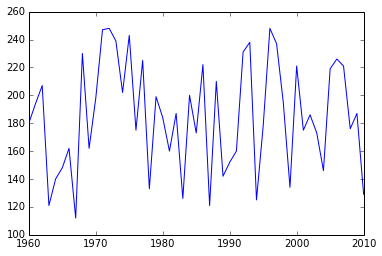

In [26]:
data = pandas.read_csv('A2_mosquito_data.csv')
plt.plot(data['year'], data['mosquitos'])

More complicated plots can be created by adding a little additional information. Let's say we want to look at how the different weather variables vary over time.

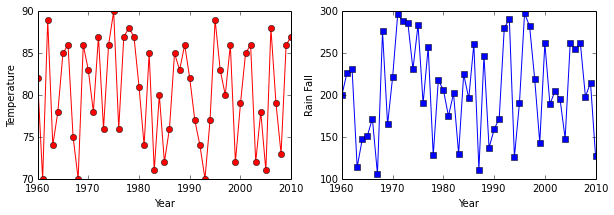

In [27]:
plt.figure(figsize=(10.0, 3.0))

plt.subplot(1, 2, 1)
plt.plot(data['year'], data['temperature'], 'ro-')
plt.xlabel('Year')
plt.ylabel('Temperature')

plt.subplot(1, 2, 2)
plt.plot(data['year'], data['rainfall'], 'bs-')
plt.xlabel('Year')
plt.ylabel('Rain Fall')
plt.show()

### Challenge

Using the data in `A2_mosquito_data.csv` plot the relationship between the number of mosquitos and temperature and the number of mosquitos and rainfall.

### Key Points

*   Import a library into a program using `import libraryname`.
*   Use the `pandas` library to work with data tables in Python.
*   Use `variable = value` to assign a value to a variable.
*   Use `print something` to display the value of `something`.
*   Use `dataframe['columnname']` to select a column of data.
*   Use `dataframe[start_row:stop_row]` to select rows from a data frame.
*   Indices start at 0, not 1.
*   Use `dataframe.mean()`, `dataframe.max()`, and `dataframe.min()` to calculate simple statistics.
*   Use `for x in list:` to loop over values
*   Use `if condition:` to make conditional decisions
*   Use the `pyplot` library from `matplotlib` for creating simple visualizations.

## Next steps

With the requisite Python background out of the way, now we're ready to dig in to analyzing our data, and along the way learn how to write better code, more efficiently, that is more likely to be correct.